<a href="https://colab.research.google.com/github/annye/Greenhouses/blob/main/Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,"/content/drive/MyDrive/Colab Notebooks/zero/static/")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline
plt.style.use("ggplot")  #using style ggplot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
co2= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zero/static/CO2Emissions.csv')
zero= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zero/static/zero.csv')

Combining Datasets and Renaming Columns

In [ ]:
df = pd.concat([zero, co2],axis=1, join="inner")
df.shape

(1238, 22)

In [ ]:
r_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'vehicle_CO2_emissions(g/km)',
    'Emissions (tCO2e)':'CO2e'
    
}
df.rename(r_col, axis='columns', inplace=True)

 Data Exploration & Data Visualization

Text(0.5, 1.0, ' Monthly CO2 Emissions')

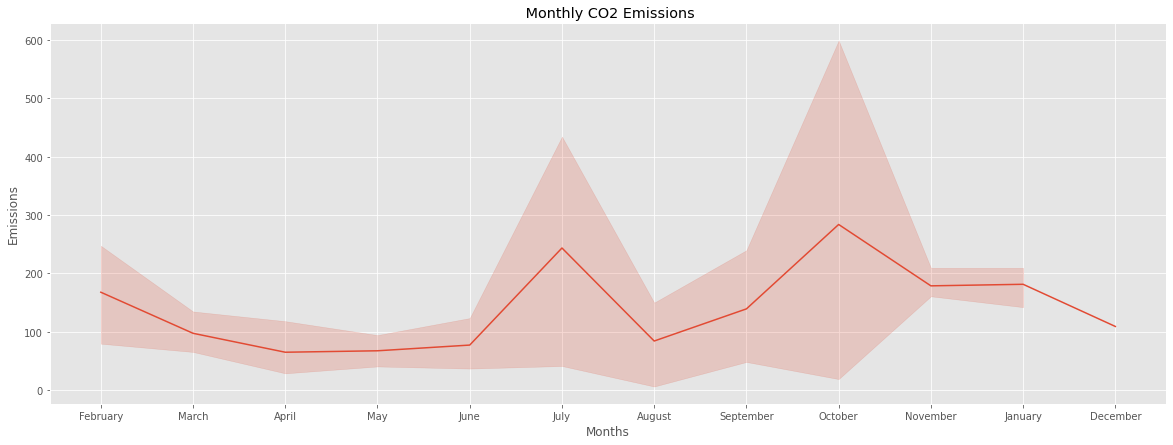

In [ ]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df, x="Period",y="CO2e")
plt.xlabel("Months")
plt.ylabel("Emissions")
plt.title(" Monthly CO2 Emissions")

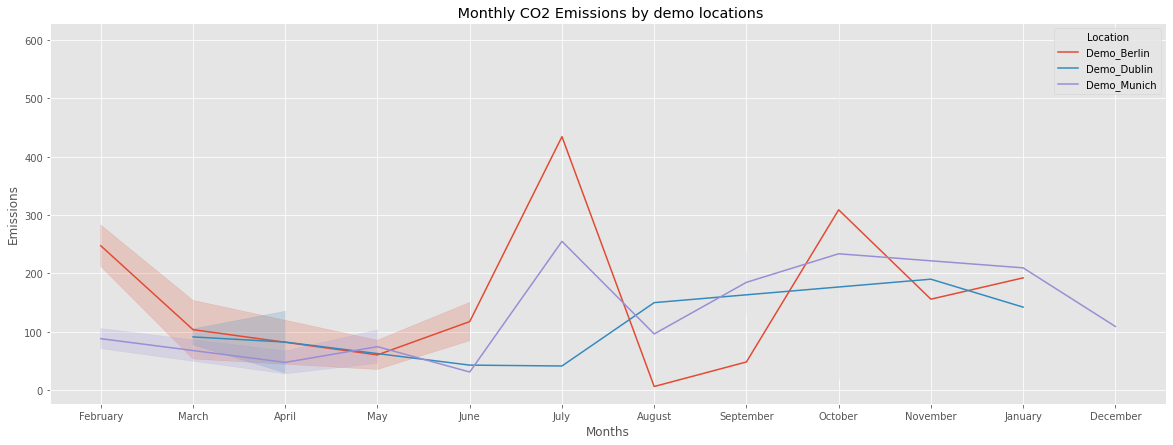

In [ ]:
# set the size of the frame of image 
plt.figure(figsize = (20,7)) 
sns.lineplot(x = "Period", y = "CO2e", data = df, hue = "Location")
plt.xlabel("Months")
plt.ylabel("Emissions")
plt.title(" Monthly CO2 Emissions by demo locations")
plt.show()

In [ ]:
table_data = df.groupby(
    ['Location','Responsible','Distance_traveled','vehicle']
).agg(
    {
        'CO2e':sum,
        'vehicle_CO2_emissions(g/km)':sum,
        'Period':'first',
        'Year':'first'
        
    }
)
table_data


cm = sns.light_palette("green", as_cmap=True)

table_data.style.background_gradient(cmap=cm)


In [ ]:
# Create a dataframe subset using only top 5  with highest total emissions values

top_5 = df.sort_values(by='CO2e', ascending=False).head(5)
top_5.style.background_gradient(cmap=cm)

,Category,Location,Description,Bussines_unit,Period,vehicle,CO2e,Distance_traveled,Responsible,Year,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,vehicle_CO2_emissions(g/km)
19,Business_travel,Demo_Berlin,Travel_management_systems,Casual_travel,October,JEEP,599.250000,21 km to less than 30 km,74.000000,2012,ASTON MARTIN,VANQUISH,MINICOMPACT,5.900000,12,A6,Z,18.000000,12.600000,15.600000,18,359
16,Business_travel,Demo_Berlin,Travel_management_systems,Casual_travel,July,HYUNDAI,434.460000,3 km to less than 5 km,16.000000,2012,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.700000,8,M6,Z,18.100000,12.200000,15.400000,18,354
11,Business_travel,Demo_Berlin,Travel_management_systems,Casual_travel,February,FIAT,282.950000,10 km to less than 20 km,92.000000,2012,ACURA,TSX,COMPACT,3.500000,6,AS5,Z,12.100000,8.300000,10.400000,27,239
5,Business_travel,Demo_Munich,Reported_by_employees,Casual_travel,July,BUGATTI,254.930000,Less than 2 km,48.000000,2012,ACURA,RLX,MID-SIZE,3.500000,6,AS6,Z,11.900000,7.700000,10.000000,28,230
18,Business_travel,Demo_Munich,Travel_management_systems,Casual_travel,September,JAGUAR,239.700000,11 km to less than 20 km,86.000000,2012,ASTON MARTIN,V8 VANTAGE S,TWO-SEATER,4.700000,8,M6,Z,18.100000,12.200000,15.400000,18,354


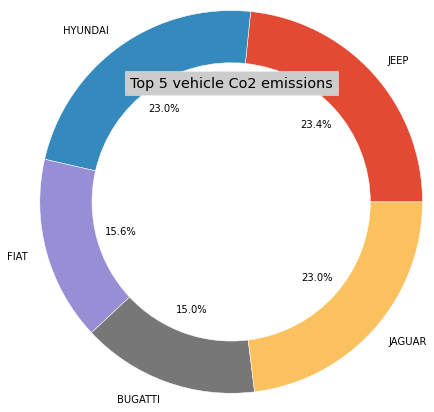

In [ ]:
plt.title("Top 5 vehicle Co2 emissions", bbox={'facecolor':'0.8', 'pad':5})


percent = top_5['vehicle_CO2_emissions(g/km)']
labels= top_5['vehicle']
my_pie,_,_ = plt.pie(percent, radius = 2.2, labels=labels, autopct="%.1f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 



plt.show()



